## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 70](#Problem-70)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 70 <a name="Problem-70"></a>

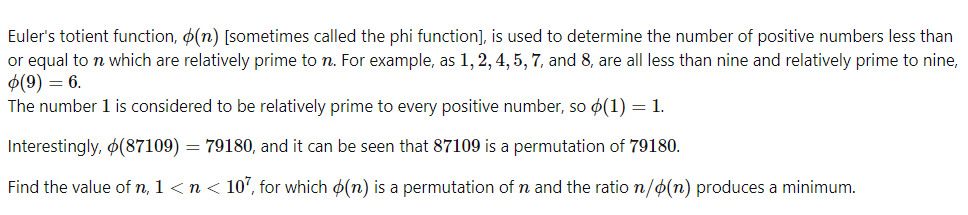

<br>
$**Hint**$

If you have look closely to the formula of a totient function [here](https://en.wikipedia.org/wiki/Euler%27s_totient_function), and do a little math we can prove:

$phi(p_1*p_2) = (p_1-1)*(p_2-1);$

which $p_1$ and $p_2$ are prime numbers.

So we can compute totient more efficiently.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time

## Main Solution <a name="Main-Solution"></a>

First we need to generate primes below $10^4$, as it is sufficient to produce multiple of $2$ primes that could not exceed $10^7$. Furthermoe, We define a function that only tells us if any given 2 numbers can be permutations of each other or not.

In [ ]:
def generate_primes_below(n):
    sieve = [True]*(n+1)
    sieve[0] = sieve[1] = False
    p = 2
    while p**2<n:
        for i in range(p**2,n+1,p):
            sieve[i] = False
        p += 1
    primes = {p for p in range(len(sieve)) if sieve[p]}

    return primes

def perm(a,b):
    if len(str(a)) != len(str(b)):
        return False
    elif sorted(str(a)) != sorted(str(b)):
        return False
    return True

Now we tackle the problem

In [ ]:
start_time = time.time()

primes = generate_primes_below(10**4)

minimum = float("inf")
answer = 0

for i in primes:
  for j in primes:
    if j < i:
      n = i * j
      if n < 10**7:
        totient = (i - 1) * (j - 1)
        if n / totient < minimum and perm(n,totient):
          minimum = n / totient
          answer = n

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 8319823 
Execution time: 0.3948 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

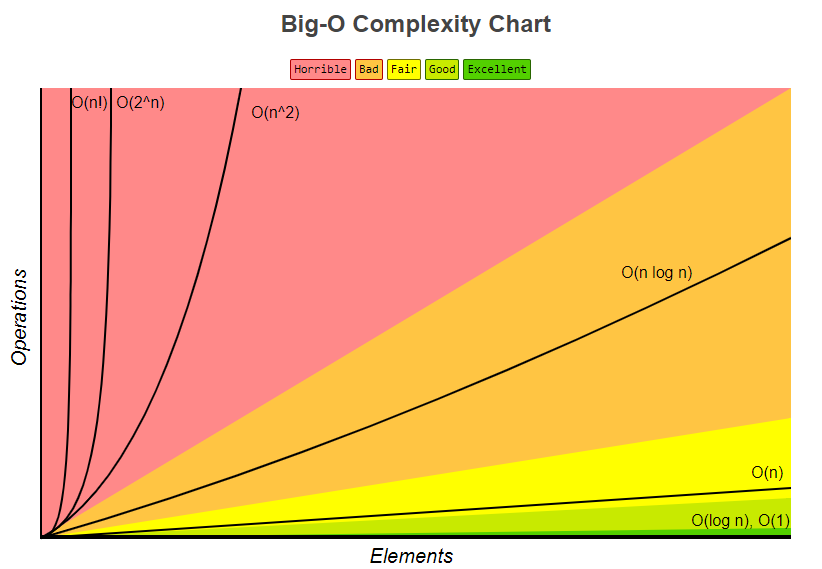

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
1. `generate_primes_below()` function: This function uses the Sieve of Eratosthenes algorithm to generate prime numbers up to a given number $n$. The time complexity of this function is $O(n *log( log (n)))$, as it iterates through all numbers up to $n$ and marks non-prime numbers.

2. `perm()` function: This function compares two strings and checks if they are permutations of each other. The time complexity of this function is $O(n *log (n))$, where $n$ is the length of the strings. This is because the function uses the `sorted()` function, which has a time complexity of $O(n *log (n))$.

3. Nested loops: The code contains nested loops that iterate over all pairs of prime numbers below $10000$. The number of iterations can be approximated as the square of the number of primes below $10000$, which is $O((n/log (n))^2)$, where $n$ is the upper limit ($10000$ in this case). However, since the code checks `if j < i`, the actual number of iterations will be less than this approximation.

Therefore, the overall **time complexity** of the code is dominated by the `generate_primes_below()` function, which is $O(n *log( log (n)))$.

Space Complexity:
1. `generate_primes_below()` function: The function uses a list called `sieve` of size $n+1$ to mark prime and non-prime numbers. It also creates a set called $primes$ to store the generated prime numbers. Therefore, the space complexity of this function is $O(n)$ for the `sieve` list and $O(n)$ for the `primes` set.

2. `perm()` function: The function uses a constant amount of space for the input variables and local variables, so it has $O(1)$ space complexity.

3. Other variables: The code uses additional variables like `minimum`, `answer`, `i`, `j`, `n` , and `totient`. These variables store integer and float values, which require a constant amount of space, so the space complexity of these variables is $O(1)$.

Therefore, the overall space complexity of the code is dominated by the `generate_primes_below()` function, which is $O(n)$ in the worst case.